<a href="https://colab.research.google.com/github/andrybrew/IHT-SEM1302-30Okt/blob/main/practice_material/practice_material/social_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Social Network Analysis**

##**Importing required libraries**

In [1]:
!pip install 'networkx'

In [2]:
import requests
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

##**Import Dataset from Apify Runs**

In [3]:
# Fetching the dataset from Apify
api_url = "https://api.apify.com/v2/datasets/na5aYoW2Rcrm9h08r/items"
api_token = "apify_api_NbL3VeatZbemul8vsNCyVKRhzmRv0M0Wh9ql"  # Substitute with your actual API token


In [4]:
# Making a GET request to the API
params = {"token": api_token, "format": "json"}  # parameter untuk permintaan
response = requests.get(api_url, params=params)

# Checking the response status
if response.status_code == 200:  # Sukses
    # Processing the JSON data into a pandas DataFrame
    data = response.json()
    df_tweet = pd.DataFrame(data)

    # Saving the DataFrame to a CSV file
    df_tweet.to_csv("twitter_data.csv", index=False)
    print("Data berhasil diunduh dan disimpan sebagai twitter_data.csv")
else:
    print(f"Terjadi kesalahan: {response.status_code}. Pesan: {response.text}")

Data berhasil diunduh dan disimpan sebagai twitter_data.csv


## **Building the Network Graph**

In [22]:
# Create edgelist
edgelist = df_tweet[['username', 'in_reply_to']].rename(columns={'username':'source','in_reply_to' : 'target'}).dropna()

# Separating list entries into rows
edgelist = edgelist.explode('target')

# Removing self-loops
edgelist = edgelist[edgelist['source'] != edgelist['target']]

# Menghapus baris dengan nilai NaN di kolom 'target'
edgelist = edgelist.dropna(subset=['target'])

# Show edgelist
edgelist

,source,target
0,@RenoldRinaldi,@Aswicahyono
6,@alim_amarullah,@PNS_Garis_Lucu
14,@snaim247,@SinarOnline
15,@pakmatsu,@BKTLHM
15,@pakmatsu,@kegblgnunfaedh
...,...,...
465,@arpas2000,@AnthonyBudiawan
466,@pilupobia,@PartaiSocmed
483,@arpas2000,@AnthonyBudiawan
484,@pilupobia,@PartaiSocmed


In [23]:
# Write edgelist to a CSV file
edgelist.to_csv('edgelist.csv', index=False)

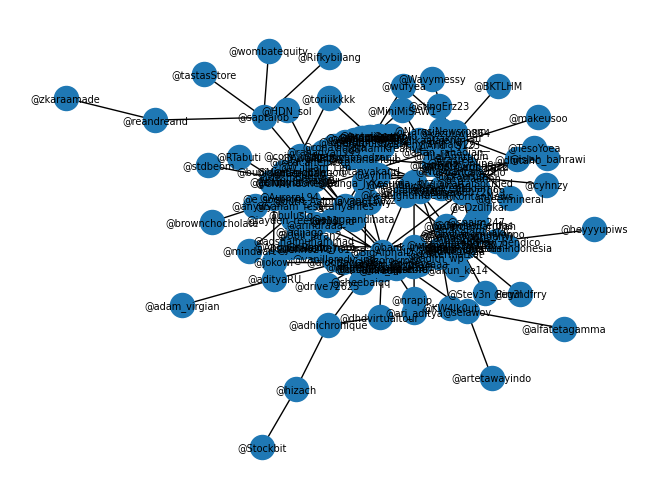

In [24]:
# Create a graph from the edgelist
G = nx.from_pandas_edgelist(edgelist, source='source', target='target')

# Visualize the graph
nx.draw(G, pos = nx.kamada_kawai_layout(G), font_size = 7, with_labels = True)

### **Network Analysis: Core Properties**

In [25]:
# Calculate number of nodes
num_nodes = G.number_of_nodes()

# Calculate number of edges
num_edges = G.number_of_edges()

# Calculate density
density = nx.density(G)

# Create a dataframe based on the results
network_properties = pd.DataFrame(data= {'num_nodes':[num_nodes],
                                 'num_edges':[num_edges],
                                 'density':[density]})
# Show network properties
network_properties

,num_nodes,num_edges,density
0,153,119,0.010234


### **Centrality Measures: Identifying Influencers**

In [26]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate closeness centrality
eigenvector_centrality = nx.closeness_centrality(G)

# Create a dataframe based on the results
centralities = pd.DataFrame([degree_centrality, betweenness_centrality,
                             closeness_centrality, eigenvector_centrality]).T
centralities.columns = ['degree_centrality', 'betweenness_centrality',
                        'closeness_centrality', 'eigenvector_centrality']

# Show centralities
centralities

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
@RenoldRinaldi,0.006579,0.0,0.006579,0.006579
@Aswicahyono,0.006579,0.0,0.006579,0.006579
@alim_amarullah,0.006579,0.0,0.006579,0.006579
@PNS_Garis_Lucu,0.006579,0.0,0.006579,0.006579
@snaim247,0.006579,0.0,0.006579,0.006579
...,...,...,...,...
@fidarnr,0.006579,0.0,0.006579,0.006579
@pilupobia,0.006579,0.0,0.006579,0.006579
@PartaiSocmed,0.006579,0.0,0.006579,0.006579
@AymanRashdanW,0.006579,0.0,0.006579,0.006579


### **Community Detection: Analyzing Modularity**

In [27]:
# Calculate the modularity
partition = community_louvain.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
partition

{'@RenoldRinaldi': 0,
 '@Aswicahyono': 0,
 '@alim_amarullah': 1,
 '@PNS_Garis_Lucu': 1,
 '@snaim247': 2,
 '@SinarOnline': 2,
 '@pakmatsu': 3,
 '@BKTLHM': 3,
 '@kegblgnunfaedh': 3,
 '@xxauruss': 5,
 '@cyhnzy': 5,
 '@ayinhet': 5,
 '@Nuswantara99': 6,
 '@Bambangmulyonoo': 6,
 '@islah_bahrawi': 6,
 '@stingErz23': 6,
 '@Bunga_JyKesuma': 6,
 '@nyaricerita': 7,
 '@dhitahc': 7,
 '@NarasiNewsroom': 7,
 '@And__S123__': 9,
 '@aeermineral': 9,
 '@makeusoo': 9,
 '@tanyakanrl': 9,
 '@Wavymessy': 9,
 '@timothyronald22': 10,
 '@ynik5': 10,
 '@ZakariaMujib': 7,
 '@rasredy': 11,
 '@hoteliercrypto': 11,
 '@HilalAmirudin': 12,
 '@tomngrh': 12,
 '@alfan_rahadian_': 13,
 '@yo2thok': 13,
 '@DwiFiki2': 14,
 '@MiniMiSAW1': 14,
 '@Nebuchanedzar_I': 14,
 '@Rheny_Prihaty29': 15,
 '@lopefutin': 15,
 '@bimo_ignatius': 3,
 '@jumalikaalajeng': 16,
 '@ronavioleta': 16,
 '@kazuuwu864': 25,
 '@wufyea': 25,
 '@discountfess': 25,
 '@Rifkybilang': 18,
 '@saptaipb': 18,
 '@1rfani': 19,
 '@AwalilRizky': 19,
 '@IlhamKreativ':

###**Advanced Visualization**

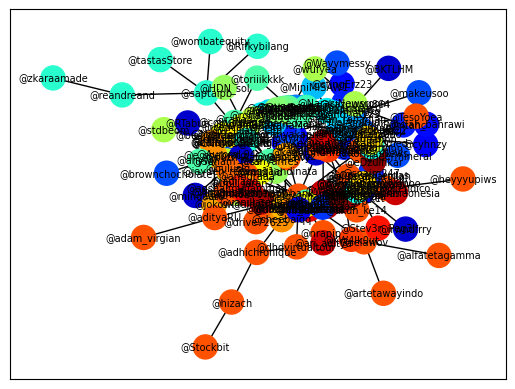

In [28]:
# Visualize the graph
nx.draw_networkx(G, pos = nx.kamada_kawai_layout(G), cmap = plt.get_cmap('jet'), node_color = values, font_size = 7, with_labels= True)

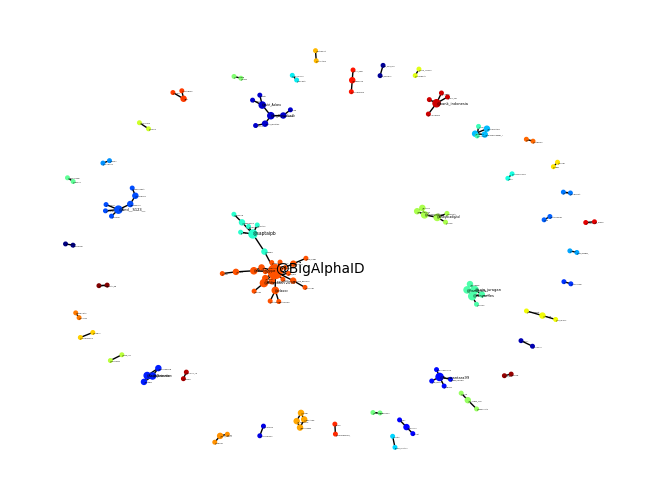

<Figure size 1500x1500 with 0 Axes>

In [31]:
# Mengubah degree centrality menjadi list ukuran untuk node
node_sizes = [degree_centrality[node] * 1000 for node in G.nodes()]

# Mengubah degree centrality menjadi list ukuran untuk label
label_sizes = {node: degree_centrality[node] * 100 for node in G.nodes()}

# Gambar jaringan dengan ukuran node berdasarkan degree centrality
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, cmap = plt.get_cmap('jet'), node_color = values)

# Tambahkan label dengan ukuran berdasarkan degree centrality
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=label_sizes[node])

plt.figure(figsize=(15, 15))
plt.show()